Import dữ liệu và đọc thư viện

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Binh\.cache\kagglehub\datasets\carrie1\ecommerce-data\versions\1


In [5]:
#import library
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
dataset = Path(path) / "data.csv"

In [7]:
#read data
df = pd.read_csv(dataset, encoding='latin1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


EDA

In [8]:
df.shape

(541909, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
#Tìm hiểu xem tại sao quantity và unitprice lại có giá trị âm
df[(df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [14]:
df[(df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [19]:
# Loại bỏ những dòng có quantity và UnitPrice < 0
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [20]:
# Chuyển InvoiceDate về dạng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [27]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
dtype: int64

In [26]:
#Lọc bỏ giá trị nan ở cột customerID 
df = df.dropna(subset=['CustomerID'])

In [31]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


C:\Users\Binh\AppData\Local\Temp\ipykernel_10212\2954183959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


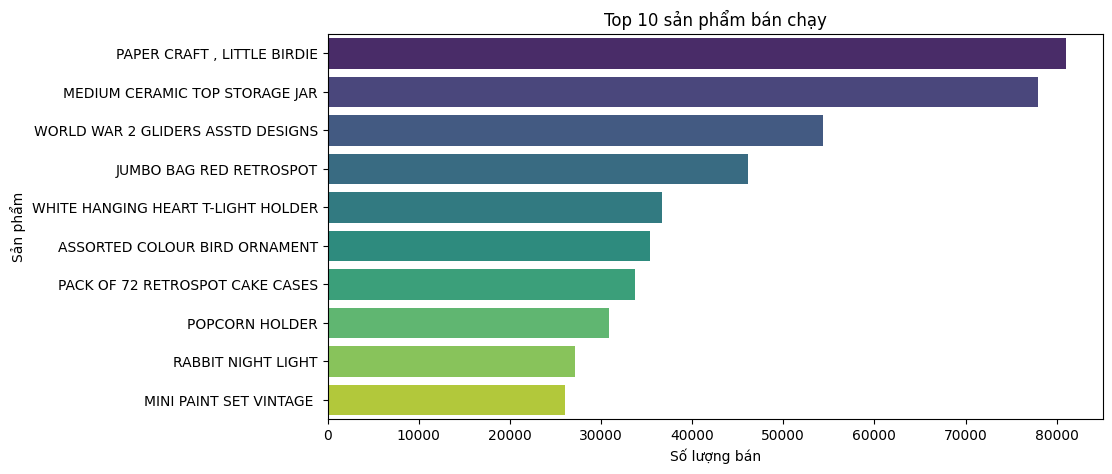

In [ ]:
#Top 10 sản phẩm bán chạy
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 sản phẩm bán chạy")
plt.xlabel("Số lượng bán")
plt.ylabel("Sản phẩm")
plt.show()

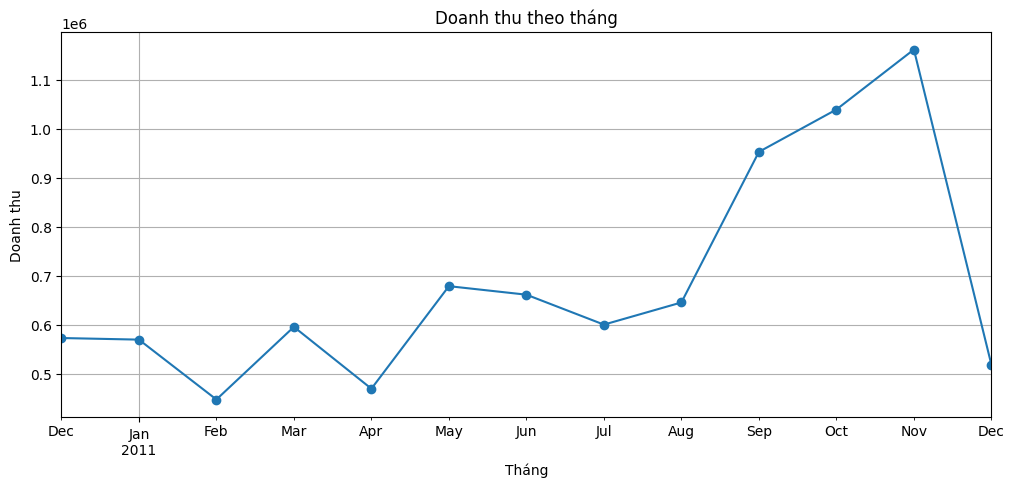

In [ ]:
#Doanh thu theo tháng
monthly_revenue = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(12,5))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Doanh thu theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.grid(True)
plt.show()

C:\Users\Binh\AppData\Local\Temp\ipykernel_10212\1156486535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette="coolwarm")


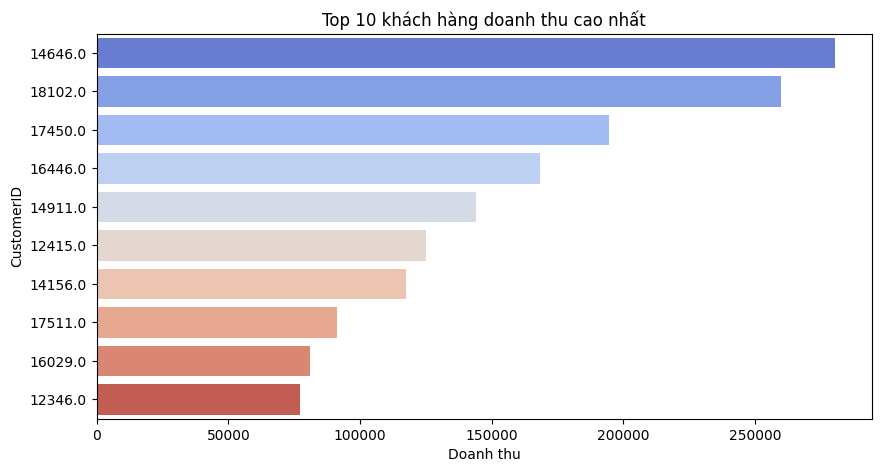

In [ ]:
#Top 10 khách hàng doanh thu cao nhất
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette="coolwarm")
plt.title("Top 10 khách hàng doanh thu cao nhất")
plt.xlabel("Doanh thu")
plt.ylabel("CustomerID")
plt.show()

In [ ]:
#Tính toán RFM

# Tính R - Recency
# Lấy ngày lớn nhất trong InvoiceDate + 1 (để làm ngày hiện tại trừ các ngày mua hàng gần nhất)
current_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by CustomerID để tính R,F,M
df_customers = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'
})

,InvoiceDate,InvoiceNo,Revenue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [43]:
# Rename
df_customers.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'MonetaryValue'
}, inplace=True)
df_customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


Chuẩn hóa dữ liệu, tối ưu điểm Skewness

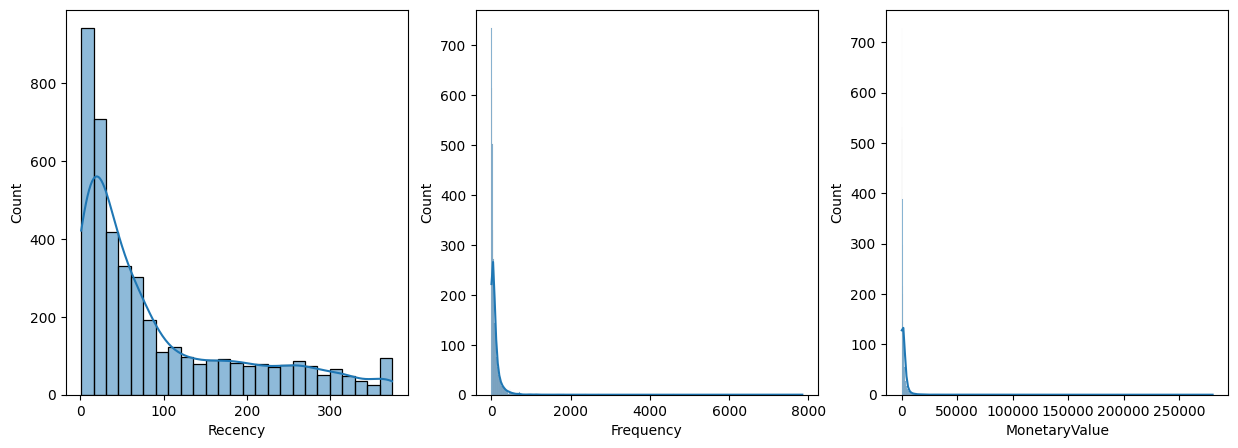

In [44]:
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

# Vẽ phân phối
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_customers['Recency'], kde=True, ax=axs[0])
sns.histplot(df_customers['Frequency'], kde=True, ax=axs[1])
sns.histplot(df_customers['MonetaryValue'], kde=True, ax=axs[2])

# Hiển thị biểu đồ
plt.show()

In [46]:
# Tính toán độ lệch
print(df_customers['Recency'].skew())
print(df_customers['Frequency'].skew())
print(df_customers['MonetaryValue'].skew())

1.2460475158158468
18.106165151380843
19.32495323682082


Các feature đang có phân phối khá bị lệch phải. Việc này sẽ làm cho model hoạt động không tốt => Tiến hành áp dụng 1 trong 4 phương pháp transfrom để đạt được điểm skewness tốt nhất:
- log transformation
- square root transformaion
- box-cox transformation
- cube root transformaion

In [47]:
# Hàm dùng cả 4 phương pháp để chuẩn hóa
from scipy import stats

def analyze_skewness(x, customers):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Vẽ biểu đồ phân phối
    sns.histplot(customers[x], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title(f'Original - {x}')

    sns.histplot(np.log1p(customers[x]), kde=True, ax=ax[0, 1])
    ax[0, 1].set_title(f'Log Transformation - {x}')

    sns.histplot(np.sqrt(customers[x]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title(f'Square Root Transformation - {x}')

    sns.histplot(pd.Series(stats.boxcox(customers[x] + 1)[0]), kde=True, ax=ax[1, 1])
    ax[1, 1].set_title(f'Box-Cox Transformation - {x}')

    plt.tight_layout()
    plt.show()

    # Tính skewness cho từng phương pháp
    original_skew = customers[x].skew().round(2)
    log_skew = np.log1p(customers[x]).skew().round(2)
    sqrt_skew = np.sqrt(customers[x]).skew().round(2)
    boxcox_skew = pd.Series(stats.boxcox(customers[x] + 1)[0]).skew().round(2)

    # In kết quả skewness
    print(f"Skewness (Original): {original_skew}")
    print(f"Skewness (Log Transformation): {log_skew}")
    print(f"Skewness (Square Root Transformation): {sqrt_skew}")
    print(f"Skewness (Box-Cox Transformation): {boxcox_skew}")

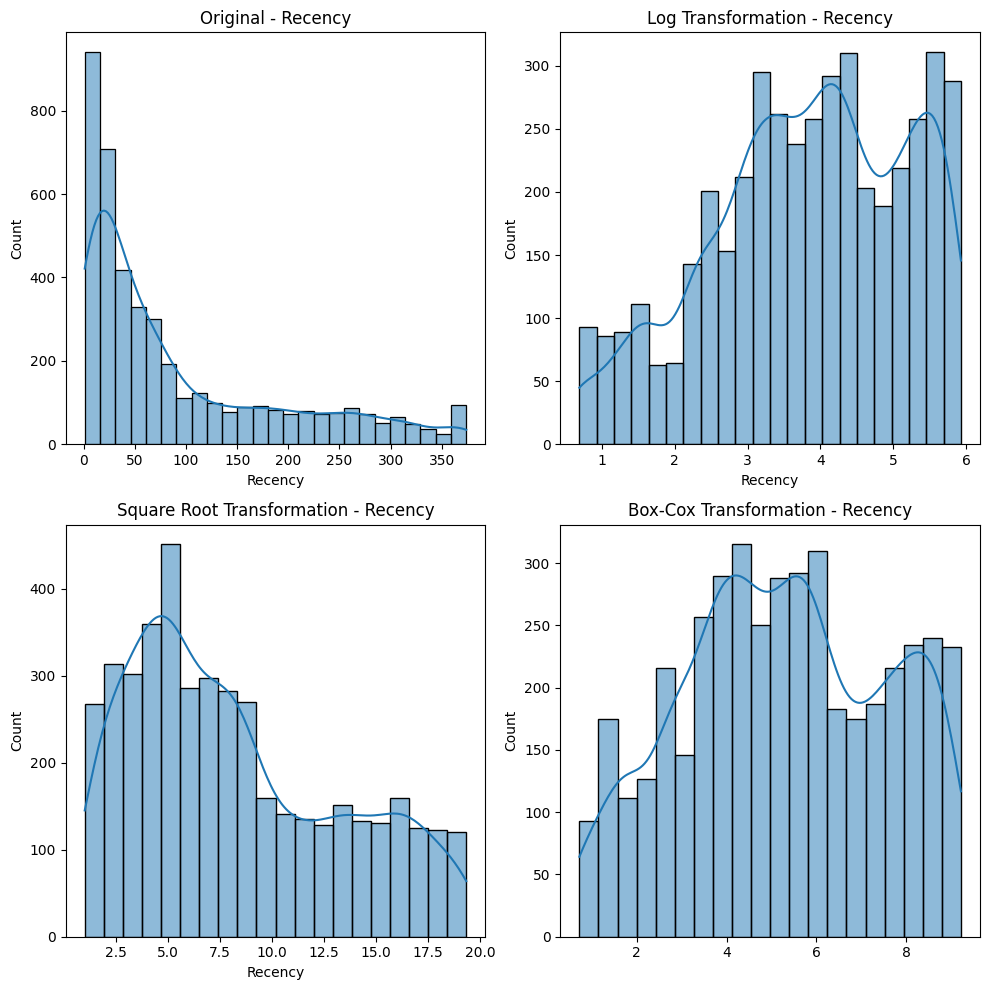

Skewness (Original): 1.25
Skewness (Log Transformation): -0.38
Skewness (Square Root Transformation): 0.59
Skewness (Box-Cox Transformation): -0.06


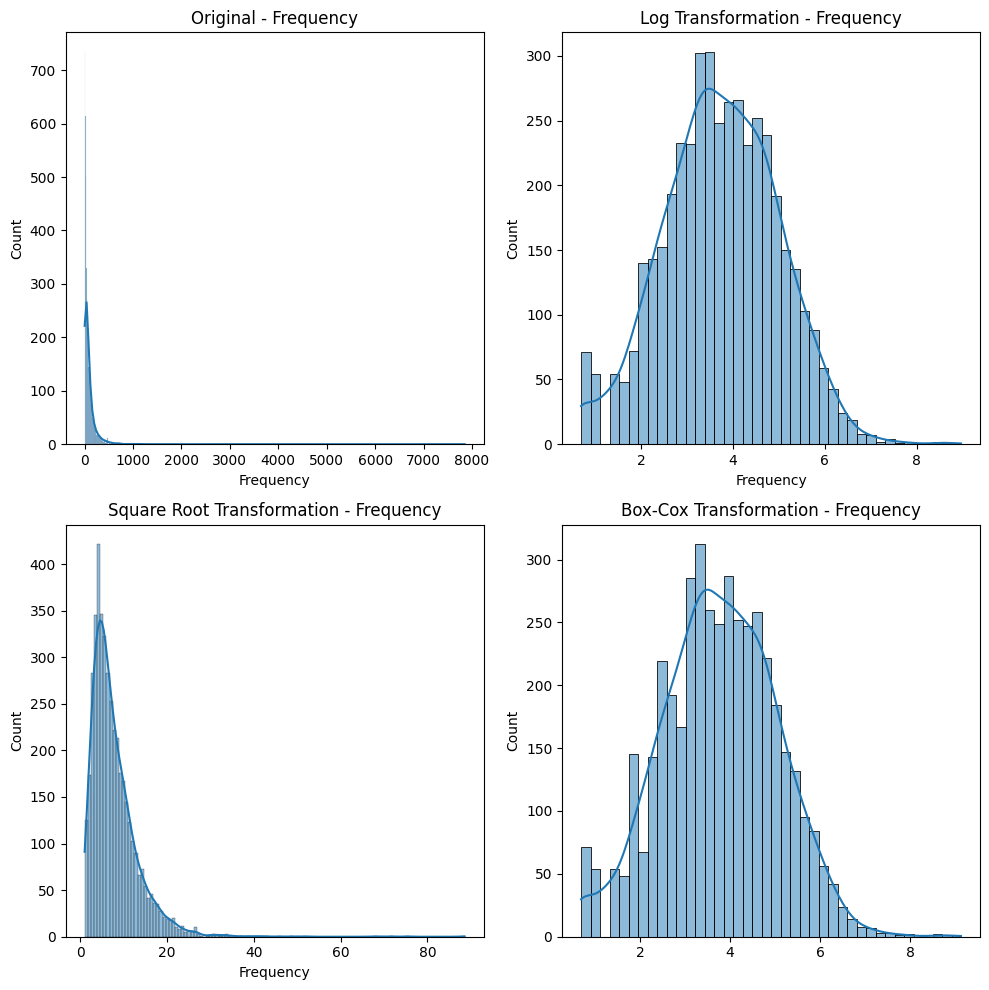

Skewness (Original): 18.11
Skewness (Log Transformation): -0.01
Skewness (Square Root Transformation): 3.22
Skewness (Box-Cox Transformation): -0.0


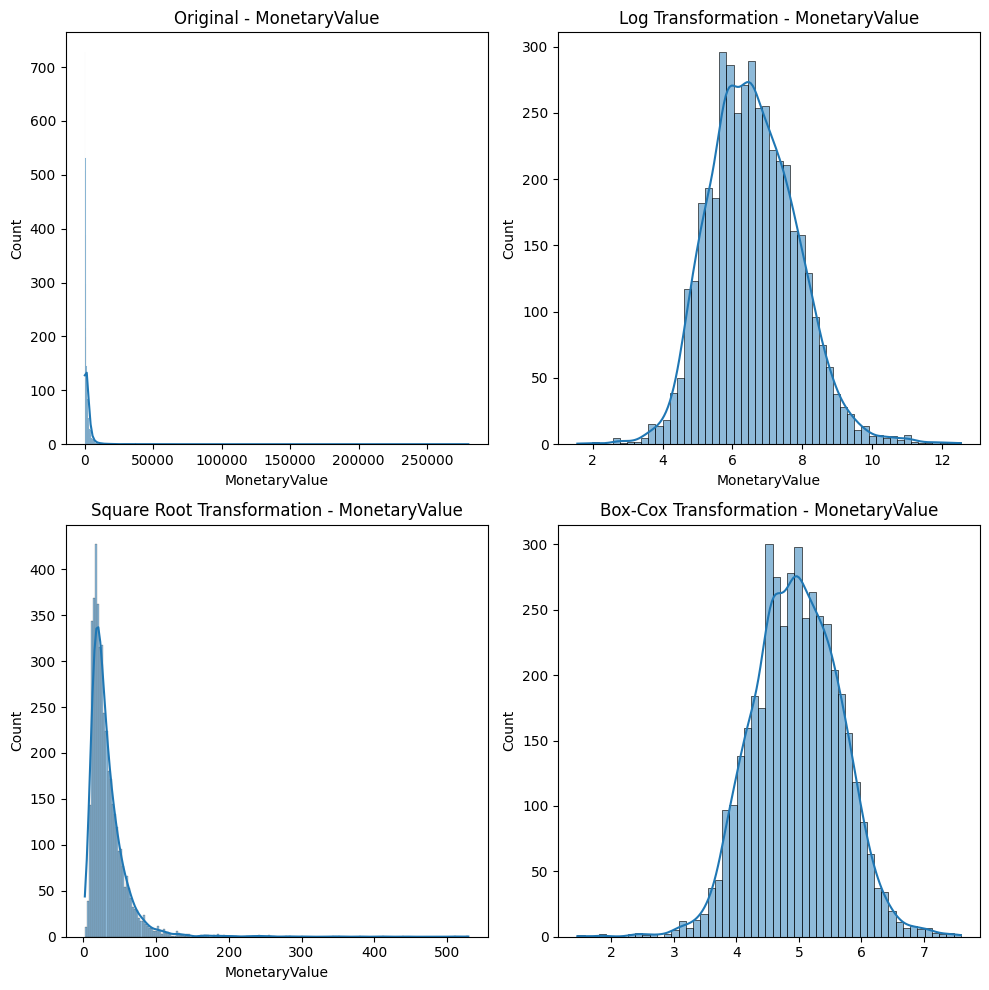

Skewness (Original): 19.32
Skewness (Log Transformation): 0.39
Skewness (Square Root Transformation): 5.89
Skewness (Box-Cox Transformation): -0.01


In [48]:
analyze_skewness('Recency', df_customers)
analyze_skewness('Frequency', df_customers)
analyze_skewness('MonetaryValue', df_customers)

Box-Cox cho kết quả cân đối nhất và giữ phân phối gần chuẩn nhất
Log transform cũng hiệu quả nhưng có thể hơi làm lệch nhẹ
Square root giảm skew nhưng không mạnh bằng log/Box-Cox

In [51]:
# Tiến hành transform dữ liệu sau khi kiểm tra
df_new = pd.DataFrame()

# Sử dụng Box-Cox transformation
df_new['Recency'] = stats.boxcox(df_customers['Recency'] + 1)[0]
df_new['Frequency'] = stats.boxcox(df_customers['Frequency'] + 1)[0]
df_new['MonetaryValue'] = stats.boxcox(df_customers['MonetaryValue'] + 1)[0]
df_new

,Recency,Frequency,MonetaryValue
0,8.903666,0.694070,7.138166
1,1.187156,5.261889,5.919794
2,5.945110,3.488877,5.485079
3,3.717828,4.339794,5.473538
4,8.791654,2.906455,4.550133
...,...,...,...
4333,8.551883,2.408958,4.172530
4334,7.642958,2.087758,3.650304
4335,2.570679,2.577610,4.163583
4336,1.804175,6.714379,5.563669


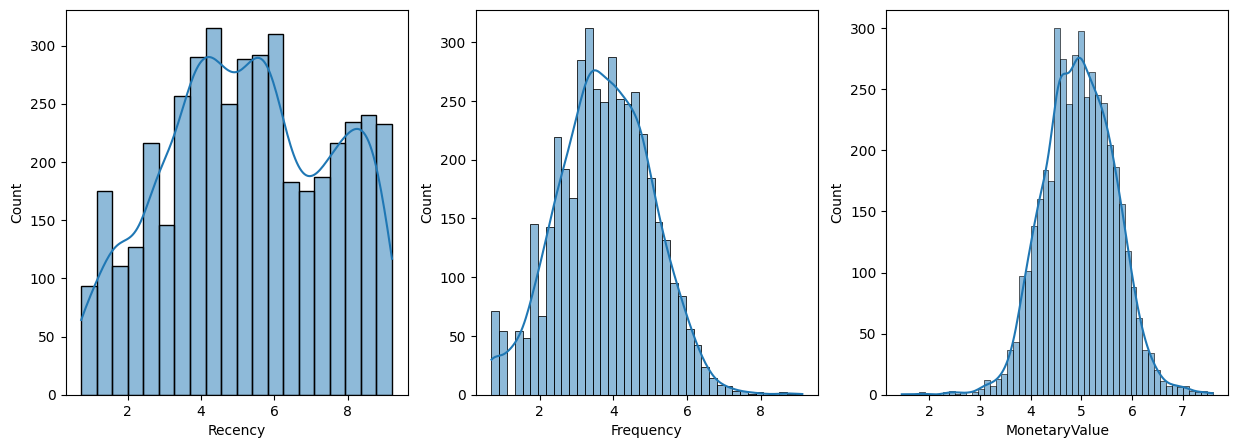

In [53]:
# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

# Vẽ phân phối
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_new['Recency'], kde=True, ax=axs[0])
sns.histplot(df_new['Frequency'], kde=True, ax=axs[1])
sns.histplot(df_new['MonetaryValue'], kde=True, ax=axs[2])

# Hiển thị biểu đồ
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(scaled, columns=df_new.columns)

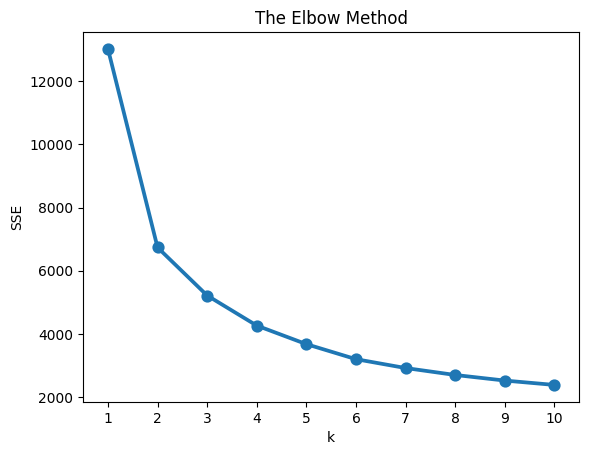

In [60]:
#Đưa dữ liệu vào Kmean

# Chọn số cụm bằng Elbow
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

SSE (Sum of Squared Errors) giảm mạnh từ k=1 → k=3, sau đó độ dốc giảm dần.
Điểm “khuỷu tay” (elbow) rõ nhất nằm ở k = 3

In [62]:
model = KMeans(n_clusters=3, random_state = 42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

Phân cụm khách hàng

In [63]:
# Sau khi đã ra được model => Thêm 1 cột label để phân cụm vào dữ liệu gốc
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,1
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,0


In [64]:
#Kiểm tra các phân cụm 
df_customers.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        191.69     14.91        283.41  1335
1         67.55     51.16        960.37  1794
2         20.13    236.73       5632.88  1209

Cluster 0 – Khách hàng giá trị thấp
Recency: 191.69 - Lâu rồi mới mua hoặc không quay lại.
Frequency: 14.91 - Mua rất ít lần.
MonetaryValue: 283.41 - Chi tiêu thấp.
Số lượng: 1335 khách.
=> Chiến lược: Gửi chiến dịch tái kích hoạt, ưu đãi mạnh để kéo họ quay lại.

Cluster 1 – Khách hàng trung thành vừa
Recency: 67.55 - Mới mua trong vài tháng gần đây.
Frequency: 51.16 - Mua thường xuyên hơn nhóm 0.
MonetaryValue: 960.37 - Chi tiêu khá.
Số lượng: 1794 khách (lớn nhất).
=> Chiến lược: Duy trì và tăng giá trị qua upsell, cross-sell, chương trình tích điểm.

Cluster 2 – Khách hàng VIP
Recency: 20.13 - Mới mua rất gần đây.
Frequency: 236.73 - Mua cực kỳ thường xuyên.
MonetaryValue: 5632.88 - Chi tiêu rất cao.
Số lượng: 1209 khách.
=> Chiến lược: Chăm sóc đặc biệt (ưu đãi độc quyền, quà tặng, dịch vụ nhanh).